# IBM Coursera Capstone (Week 2)
### Applied Data Science Capstone by IBM/Coursera

* [Introductions](#introduction)
* [Data](#Data)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results and Discussion](#Results and Discussion)
* [Conclusion](#Conclusion)

### Introductions

This project focuses on creating a predictive model that can accurately gauge danger levels for drivers, given a list of conditions. These danger levels will warn of dangers in these conditions with or without the influence of alcohol/speeding. This will be targeted at a company that would use this information to possibly do an awareness campaign or possibly sell a product to warn young/new drivers about conditions ahead and how their actions can influence their danger..

We are going to examine past examples of accidents and compare them against the severity of the accident. We won’t focus on the likelihood of getting into an accident, but the severity of an accident if you get into one given a host of conditions. 

By using the Data Science knowledge we’ve gained throughout the course, we will be able to glean a good accuracy for a predictive model to help us warn these new drivers. This model can then be used in the company to use as they need.



### Data

After examining our goal, the factors that will affect our model are:
Light conditions
Road conditions
Weather conditions
Speeding
Influence of drugs/alcohol

The data set for Collisions will be sufficient to collect the information that we need to build this model. With 194673 entries, we should have enough data to give an accurate rating. 

We are ignoring some factors, like:
- Where the accident happened (crosswalk, parking lot, etc.)
- What time the accident happened
- The amount of people involved in the accident

We are focused on the single driver of the vehicle, and their likelihood of being in a serious accident. We are also grouping together being under the influence. Drugs or Alcohol are going to be a binary Yes or No for simplicity sake.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data-Collisions.csv", dtype='str')
print(df.shape)

(194673, 38)


#### Data Cleaning
Drop the columns we have no use for, and print our a header to see a snippit of the data.

In [3]:
trimmedDF = df.drop(['OBJECTID', 'X', 'Y', 'INCKEY', 'COLDETKEY', 
                     'REPORTNO', 'ADDRTYPE', 'INTKEY', 'LOCATION',
                     'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC',
                     'COLLISIONTYPE', 'PEDCOUNT', 'PEDCYLCOUNT',
                     'VEHCOUNT', 'INCDATE', 'INCDTTM',
                     'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
                    'INATTENTIONIND', 'PEDROWNOTGRNT','SDOTCOLNUM',
                     'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
                     'CROSSWALKKEY','HITPARKEDCAR', 'STATUS',
                     'SEVERITYCODE.1', 'PERSONCOUNT'], axis=1)
trimmedDF.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,N,Overcast,Wet,Daylight,NaN
1,1,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,0,Overcast,Dry,Daylight,NaN
3,1,N,Clear,Dry,Daylight,NaN
4,2,0,Raining,Wet,Daylight,NaN


Cleaning the dataframe of and NaN values, and also removing rows that contain unspecific conditions, as those will not help our model. 

In [4]:


trimmedDF.loc[(trimmedDF['UNDERINFL'] == '1'),'UNDERINFL']='Y'
trimmedDF.loc[(trimmedDF['UNDERINFL'] == '0'),'UNDERINFL']='Y'

trimmedDF = trimmedDF[trimmedDF.LIGHTCOND != 'Unknown']
trimmedDF = trimmedDF[trimmedDF.LIGHTCOND != 'Other']
trimmedDF = trimmedDF[trimmedDF.LIGHTCOND != 'Dark - Unknown Lighting']
#trimmedDF['LIGHTCOND'] = trimmedDF['LIGHTCOND'].replace('ABC', 'A')

trimmedDF = trimmedDF[trimmedDF.ROADCOND != 'Unknown']
trimmedDF = trimmedDF[trimmedDF.ROADCOND != 'Other']

trimmedDF = trimmedDF[trimmedDF.WEATHER != 'Unknown']
trimmedDF = trimmedDF[trimmedDF.WEATHER != 'Other']

trimmedDF['SPEEDING'] = trimmedDF['SPEEDING'].fillna('N')

trimmedDF = trimmedDF.dropna()

cleanedDF = trimmedDF

Here we can see the breakdown for each category and the counts for each. This will be useful later for our surface examination of the data.

In [5]:
print(cleanedDF['SEVERITYCODE'].value_counts())
print(cleanedDF['UNDERINFL'].value_counts())
print(cleanedDF['WEATHER'].value_counts())
print(cleanedDF['ROADCOND'].value_counts())
print(cleanedDF['LIGHTCOND'].value_counts())
print(cleanedDF['SPEEDING'].value_counts())

1    114269
2     55680
Name: SEVERITYCODE, dtype: int64
N    89484
Y    80465
Name: UNDERINFL, dtype: int64
Clear                       108822
Raining                      32644
Overcast                     26922
Snowing                        825
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               46
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               121487
Wet                46319
Ice                 1080
Snow/Slush           833
Standing Water       105
Sand/Mud/Dirt         65
Oil                   60
Name: ROADCOND, dtype: int64
Daylight                    112618
Dark - Street Lights On      46748
Dusk                          5648
Dawn                          2413
Dark - No Street Lights       1408
Dark - Street Lights Off      1114
Name: LIGHTCOND, dtype: int64
N    160864
Y      9085
Name: SPEEDING, dtype: int64


#### Quick examination of surface data
Here we are going to explore the data further now that irrelivant data has been removed completely, which leaves us with a clean data frame to work with (Hence the name 'cleanedDF').

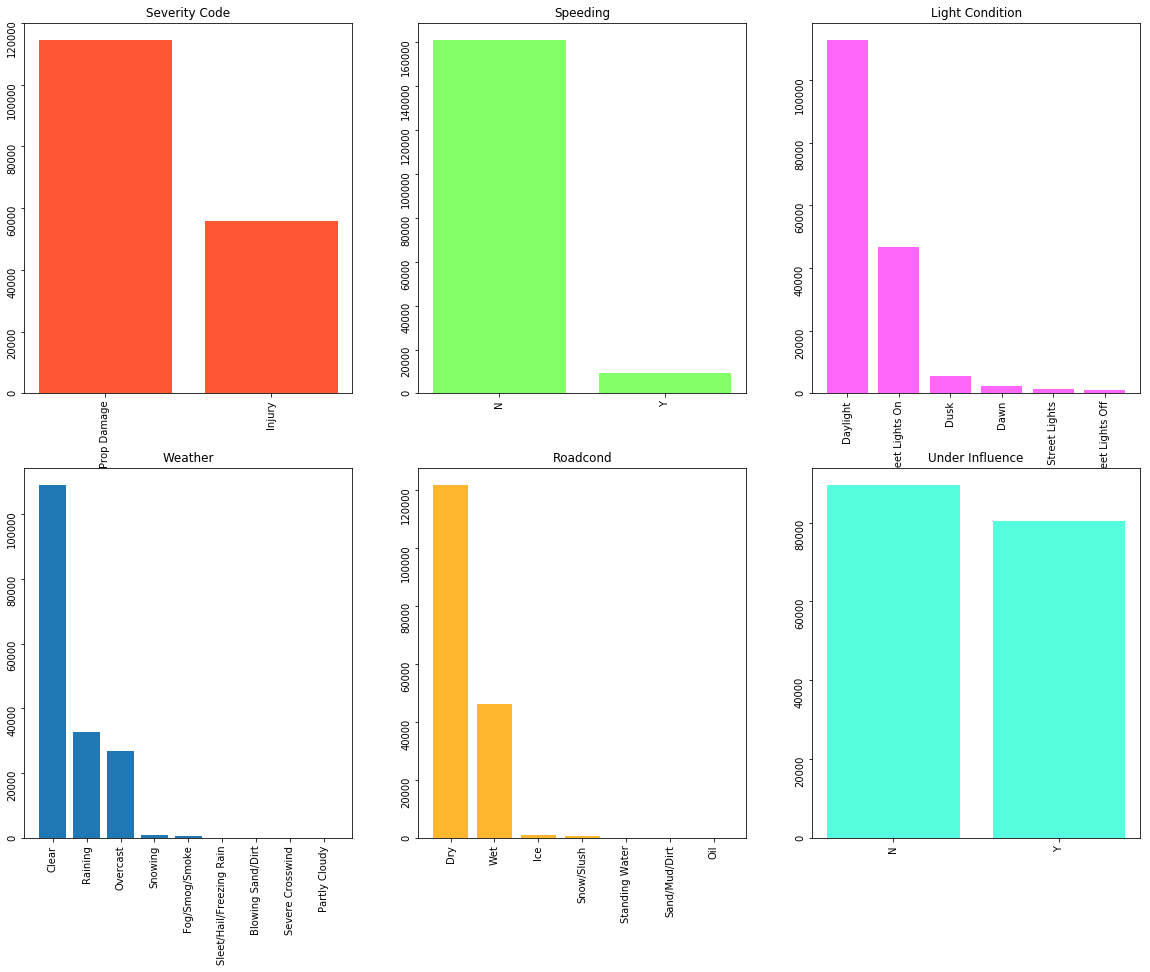

In [6]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].bar(['Prop Damage', 'Injury'], cleanedDF['SEVERITYCODE'].value_counts().values, color=['#ff5733'])
axs[0, 0].set_title('Severity Code')
axs[0, 0].tick_params(labelrotation=90)
axs[0, 1].bar(cleanedDF['SPEEDING'].value_counts().index, cleanedDF['SPEEDING'].value_counts().values, color='#83ff67')
axs[0, 1].set_title('Speeding')
axs[0, 1].tick_params(labelrotation=90)
axs[0, 2].bar(cleanedDF['LIGHTCOND'].value_counts().index, cleanedDF['LIGHTCOND'].value_counts().values, color='#ff67fa')
axs[0, 2].set_title('Light Condition')
axs[0, 2].tick_params(labelrotation=90)
axs[1, 0].bar(cleanedDF['WEATHER'].value_counts().index, cleanedDF['WEATHER'].value_counts().values)
axs[1, 0].set_title('Weather')
axs[1, 0].tick_params(labelrotation=90)
axs[1, 1].bar(cleanedDF['ROADCOND'].value_counts().index, cleanedDF['ROADCOND'].value_counts().values, color = '#feb62f')
axs[1, 1].set_title('Roadcond')
axs[1, 1].tick_params(labelrotation=90)
axs[1, 2].bar(cleanedDF['UNDERINFL'].value_counts().index, cleanedDF['UNDERINFL'].value_counts().values, color = '#56fedf')
axs[1, 2].set_title('Under Influence')
axs[1, 2].tick_params(labelrotation=90)

fig.set_figheight(15)
fig.set_figwidth(20)

#axes = cleanedDF['SEVERITYCODE'].plot.bar(rot=0, subplots=True)

Transform the data from labels to integers so that we can use logistic regression

In [7]:
print(cleanedDF['LIGHTCOND'].value_counts())

Daylight                    112618
Dark - Street Lights On      46748
Dusk                          5648
Dawn                          2413
Dark - No Street Lights       1408
Dark - Street Lights Off      1114
Name: LIGHTCOND, dtype: int64


Create dicts to map out each string entry to an int value for the classifier to process correctly

In [8]:
severityDict = {'1':0, '2':1}
underinflDict = {'N':0, 'Y':1}
weatherDict = {'Clear':0, 'Raining':1,'Overcast':2, 'Snowing':3,'Fog/Smog/Smoke':4,
               'Sleet/Hail/Freezing Rain':5, 'Blowing Sand/Dirt':6, 'Severe Crosswind':7,
               'Partly Cloudy':8}
roadcondDict = {'Dry':0, 'Wet':1, 'Ice':2, 'Snow/Slush':3, 'Standing Water':4, 'Sand/Mud/Dirt':5, 'Oil':6}
lightcondDict = {'Daylight':0, 'Dark - Street Lights On':1, 'Dusk':2, 'Dawn':3, 'Dark - No Street Lights':4, 
                 'Dark - Street Lights Off':5}
speedingDict = {'N':0, 'Y':1}

Replaces the tags in the dataframe with coded values, for the classifiers

In [9]:
test = cleanedDF

test['SEVERITYCODE'] = test.SEVERITYCODE.replace(severityDict)
test['UNDERINFL'] = test.UNDERINFL.replace(underinflDict)
test['WEATHER'] = test.WEATHER.replace(weatherDict)
test['ROADCOND'] = test.ROADCOND.replace(roadcondDict)
test['LIGHTCOND'] = test.LIGHTCOND.replace(lightcondDict)
test['SPEEDING'] = test.SPEEDING.replace(speedingDict)


test.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,1,0,2,1,0,0
1,0,1,1,1,1,0
2,0,1,2,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,0,0


Double check that the data is cleaned out and we don't have any residual NaN values

In [10]:
print(test['SEVERITYCODE'].isna().sum())
print(test['UNDERINFL'].isna().sum())
print(test['WEATHER'].isna().sum())
print(test['ROADCOND'].isna().sum())
print(test['LIGHTCOND'].isna().sum())
print(test['SPEEDING'].isna().sum())

0
0
0
0
0
0


This ends the data cleaning, From here we should be prepared enough to actually model the product

# Methodology
Our goal is to create a predictive model that can give us a danger rating of the road, given certain conditions. We will guage the accuracy by comparing the model against a testing set of data, and based off that accuracy, we will select a model to be the finalized product to give the company that requested the results. Based on the results, we can then rate the model and either recommend it's use, or perhaps require more data in return. This will be evaluated in the Result section later on.
<nr>
Each time a model is crated, it gets evaluated for its best result and then gets added to a list to be compared at the completion of all of the models. This gives us an easy way to see them when they have completed. I should remind those who wish to follow along that our data set is quite large, so some of the models like KNN and SVM tend to run for a minute before completion.

# Analysis

Split testing an training data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = test.drop('SEVERITYCODE', axis=1)
y = test['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Get the accuracy ratings ready to decide on a good model

In [12]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

f1List = []
jaccardList = []

### Logistic Regression


In [13]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logregYhat = logreg.predict(X_test)
jaccardList.append(jaccard_similarity_score(y_test, logregYhat))
f1List.append(f1_score(y_test, logregYhat, average='weighted'))

C:\Users\Chandler Via\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### K Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

maxK = 0
maxAcc = 0

for i  in range(1, 10):
    k = i
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    knnYhat = logreg.predict(X_test)
    score = jaccard_similarity_score(y_test, knnYhat)
    if score > maxAcc:
        maxAcc = score
        maxK = k

print("Highest accuracy was", maxAcc, "at K =", maxK)

neigh = KNeighborsClassifier(n_neighbors = maxK).fit(X_train, y_train)
knnYhat = neigh.predict(X_test)
jaccardList.append(jaccard_similarity_score(y_test, knnYhat))
f1List.append(f1_score(y_test, knnYhat, average='weighted'))

Highest accuracy was 0.6703337850367306 at K = 1


### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree.fit(X_train,y_train)

dtYhat = dTree.predict(X_test)
jaccardList.append(jaccard_similarity_score(y_test, dtYhat))
f1List.append(f1_score(y_test, dtYhat, average='weighted'))


C:\Users\Chandler Via\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [16]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', probability=True)
clf.fit(X_train, y_train) 

svmYhat = clf.predict(X_test)
jaccardList.append(jaccard_similarity_score(y_test, svmYhat))
f1List.append(f1_score(y_test, svmYhat, average='weighted'))

# Results and Discussion
Below is a dataframe that consists of the accuracy ratings for each of the four models we created. 

In [17]:
resultDF = pd.DataFrame(data = {'Jaccard':jaccardList, 'F1 Score':f1List}, index = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'])
resultDF

,Jaccard,F1 Score
Logistic Regression,0.670334,0.538033
KNN,0.519863,0.533896
Decision Tree,0.670334,0.538033
SVM,0.670334,0.538099


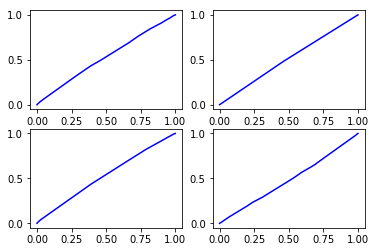

In [18]:
import sklearn.metrics as metrics
fig, axs = plt.subplots(2, 2)

#Generate graph for LOGREG
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
axs[0, 0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

#Generate graph for KNN
y_pred_proba = neigh.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
axs[0, 1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

#Generate graph for DTREE
y_pred_proba = dTree.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
axs[1, 0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

#Generate graph for SVM
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
axs[1, 1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.show()

As we can see from the ROC curves, our algorithm isn't performing to a level that would be desired. There are many reasons that this can be, and after plenty of trial and error, these are the best restults from each model. From the Introduction, a problem we had was we were missing non-accident information. This is an issue, because we can't give an accurate probability of getting into an accident, given the road/weather/light conditions. We could, in theory, take a study that was done and take a probability from that as a base prob. for getting into an accident, but that wouldn't mean that it takes in the conditions to give us a probability. This would be a cheap and ineffective method. Because of this issue, an increased data set that contained non-accidents would've been fantastic for our model. 


# Conclusion

The purpose of this project was to identify and create a model that can predict the danger of an accident, given weather conditions. We have a model that can predict a result, but with a rather poor accuracy. By trimming down our data into values we can use in these models, we have found that we are (most likely) lacking the data required to give a better result. By creating four different models, all ranging at poor accuracy results, we might be able to conclude that a wider range in data might need to be given. 

Final decision of this model is given up to the client/management to review and either request a repeat from the data collection stage, or perhaps redefine goals in the business decision phase.